<a href="https://colab.research.google.com/github/bvenegasa/audio-apuntes-con-Whisper-ESP/blob/main/DisTrackted_Apuntes_Clases_con_Whisper_API_(OpenAI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usos de este Google Colab:

1. Transcripción de audios en español a español.
2. Transcripción de videos en español a español.
3. Subtitular videos en español a español.

* Links de RRSS (Twitter, YouTube) al final de esta página para enterarte de actualizaciones con implementaciones complementarias, como transcribir y/o subtitular directamente desde otros idiomas al español.

## Para qué?

#### 1. Automatizar la toma de apuntes.
#### 2. Convertir el texto en .PDF para poder analizarlos, resumirlos o interactuar con ellos a través de modelos de lenuaje tales como ChatGPT.

###Detalles del uso:

- Si tienes autorización para grabar tus clases en la Universidad, o estás cursando algún diplomado en que tengas permiso a descargar videos o audios, esta es la forma más fácil de ahorrarte la necesidad de tomar apuntes y poder filtrar desde la información "fuente" lo que deseas conservar como tus apuntes y así crear tu propia versión ajustada a tus conocimientos previos y a tu orden particular.
- Pretendo más adelante integrar esto para poder utilizar herramientas como ChatGPT para interrogar al texto directamente o realizar resumenes de forma automatizada. Cuéntame si esto te parece interesante :). Por ahora, puedes guardar el archivo en .PDF usando cualquier herramienta online, o Word, o Acrobat y utilizar GPT-4 (la versión que cuesta 19 dólares al mes y que permite utilizar plugins) para chatear con el PDF utilizando alguno de los plugins. He probado "AskYourPDF" con buenos resultados. Sin embargo, existen otros y debieras utilizar el que te funcione mejor y te genere más confianza. Sugiero NUNCA compartir información privada con OpenAI (incluyendo ChatGPT) ni con plugins de terceras personas (tales como el que mencioné, o cualquier otro).


Autor: @Dis_Trackted

#### Puedes seguirme en mi canar de [YouTube](https://https://www.youtube.com/channel/UCzQDoFaRCNmLZfTDUlxaWqA) o en [Twitter](https://https://twitter.com/Dis_Trackted) como @Dis_Trackted para más proyectos interesantes relacionados a usos de IA en la vida cotidiana.

# Transcripción de audio con Whisper y PyDub

Este cuaderno muestra cómo usar la API de Whisper de OpenAI y la biblioteca PyDub para transcribir archivos de audio en español. El proceso se divide en dos pasos principales:

1. Dividir el archivo de audio en fragmentos de 22 minutos.
2. Transcribir cada fragmento con Whisper.

## Preparación

Todo lo que tienes que hacer está en estas instrucciones. Básicamente sigue el "paso a paso" y no deberías tener problemas. Anda leyendo el texto y ejecutando las "celdas de código" en el orden que aparecen una vez que hayas hecho lo que te solicita el texto. Ante cualquier duda, no dudes en contactarme a través de RRSS.

Primero, necesitamos instalar las bibliotecas necesarias y configurar nuestra clave de API de OpenAI: código que te identifica como persona única y a quien están asociados los cobros por utilizr su IA "Whisper" en este caso (como se mencionó en el punto 2 del párrafo anterior).

* Si te interesa habilitar la GPU que ofrece gratis "Google Colab" para correr el programa más rápido, puedes hacerlo de la siguiente forma (en este programa en concreto no debiese cambiar mucho el rendimiento, en caso que prefieras no habilitarla por mayor simpleza):
1. Anda a "Entorno de Ejecución" (5to menú desde izquuierda a derecha).
2. "Cambiar tipo de entorno de ejecución".
3. Cambiar a esta configuración (foto):

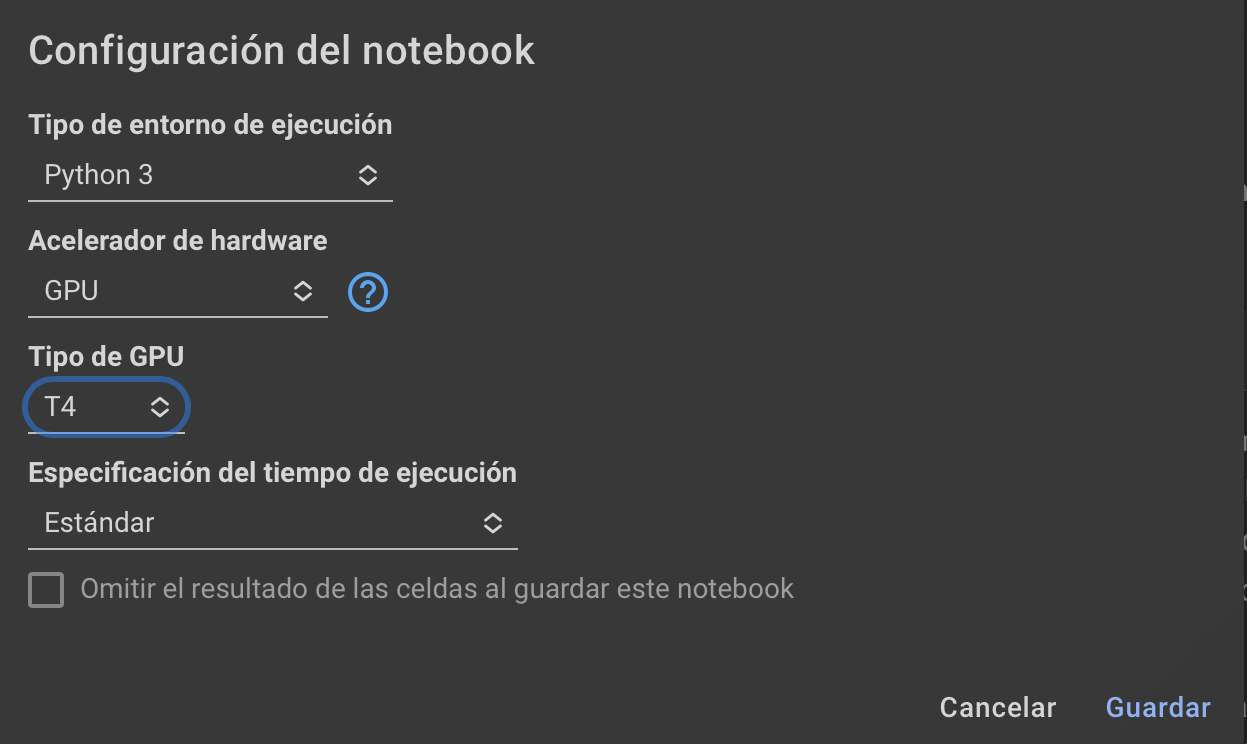

#### Puedes obtener una clave de API de OpenAI [registrándote en OpenAI.](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjwnYzhvMX_AhUnBbkGHQmnAKIQFnoECCAQAQ&url=https%3A%2F%2Fplatform.openai.com%2Fsignup&usg=AOvVaw0iICG4lOb0kakwcpruUu2h)

--

Una vez te hayas registrado, puedes [crear tu API KEY acá](https://https://platform.openai.com/account/api-keys). Debes guardarla en algún lugar porque luego no podrás visualizarla en la página de OpenAI. No importa tanto si la pierdes, porque puedes crear una nueva. Sin embargo -de extravierla- debes asegurarte de borrarla inmediatamente para que no siga siendo posible realizar nuevos cobros asociadas a ella.



---

**NO debes compartir bajo ninguna circunstancia tu API Key**. Está asociada a tu tarjeta de crédito o al cupo que hayas configurado como límite (según cómo lo hayas configurado). Si compartes tu API Key, **otras personas podrían utilizar** la API en Whisper, ChatGPT o cualquier otra herramienta de OpenAI y que sean **cobrados a ti**.

In [ ]:
!pip install openai pydub

import os

# Reemplace 'YOUR_OPENAI_API_KEY' con su clave de API de OpenAI
os.environ["OPENAI_API_KEY"] = 'YOUR_OPENAI_API_KEY'



##Subir el archivo de audio
Para subir el archivo de audio que desea transcribir, puede usar la función de subida de archivos de Google Colab. Para hacerlo, haga clic en el icono del panel izquierdo (el que parece un folder) y luego haga clic en el icono de subida (el que parece una hoja con una flecha). Seleccione su archivo de audio y espere a que se suba.

Una vez que el archivo esté subido, puede obtener su ruta haciendo clic derecho en el archivo y seleccionando "Copy path". Reemplace la ruta del archivo en la función split_audio.



## Dividir el archivo de audio
Usamos la biblioteca PyDub para dividir el archivo de audio en fragmentos de 22 minutos. **El límite real de "Whisper" es de 25 MB por fragmento**, pero usamos 22 minutos para estar seguros.

## Qué hacer si mis trozo de audio terminan pesando más de 25MB?

En ese caso, Whisper entregaría el archivo transcrito final con algunos segmentos sin texto entre segmento y segmento, y al final. En otras ocasiones, el modelo repite varias veces la última parte que transcribió, en vez de dejar eso sin texto como si fuese "silencio". Para solucionar esto, puedes asegurarte cambiando el parámetro que dice 22 * 60 * 1000. El número 22 corresponde a los minutos. Si lo cambias a 10 (minutos) no habrá ningún problemas. No debes cambiar más que el número 22, ni debes escribir nada más (por ejemplo, no debes escribir "10 minutos").

El tiempo que demore la transcripción no debiera variar con 22 o con 10. Sin embargo, si uno deseara descargar las transcripciones como si fueran subtítulos (con la información de en qué momento del tiempo de grabación se está diciendo cada frase), habrá que descargar el doble de archivos (dado que 10 es aproximadamente la mitad del 22). ***Si solamente se desea la transcripción final, no habrá ninguna diferencia y puedes usarlo siempre en 10 para mayor simplicidad.***

In [4]:
import openai
from pydub import AudioSegment

def split_audio(file_path, chunk_length_ms=22 * 60 * 1000):  # La duración del fragmento es de 22 minutos.
    audio = AudioSegment.from_file(file_path)
    chunks = []
    for i in range(0, len(audio), chunk_length_ms):
        chunks.append(audio[i:i+chunk_length_ms])
    return chunks


##Transcribir los fragmentos de audio
Luego, usamos Whisper para transcribir cada fragmento. Guardamos cada fragmento en un archivo temporal y luego leemos la transcripción.

In [ ]:
#Ejecutar esta celda nos permitirá habilitar el comando "!whisper" que usaremos más adelante

!pip install git+https://github.com/openai/whisper.git


In [5]:
def transcribe_audio(chunks):
    transcriptions = []
    for i, chunk in enumerate(chunks):
        # Guardar el fragmento en un archivo temporal
        temp_filename = f"temp_{i}.mp3"
        chunk.export(f"/content/{temp_filename}", format="mp3")
        # Usar Whisper para transcribir el fragmento
        !whisper "/content/{temp_filename}" --task transcribe --model medium --verbose False --output_dir /content/audio_transcription
        # Leer la transcripción y agregarla a la lista
        with open(f'/content/audio_transcription/temp_{i}.txt') as f:
            transcriptions.append(f.read())
    return transcriptions


## Ejecución
Finalmente, ejecutamos las funciones con nuestro archivo de audio y guardamos las transcripciones en un archivo .txt.

* **Asegúrate que tu audio haya terminado de subirse en en la parte izquierda de la pantalla**. Debe aparecer el nombre del archivo y si observas en la parte de abajo, ya no debería estarse subiendo (aparece como un círculo que se va rellenando, hasta que termina de subir). Si omites este tiempo de espera, el programa dará error porque no logrará encontrar el archivo.

In [ ]:
chunks = split_audio("Ruta_o_Path_Al_Archivo_Aca")
transcriptions = transcribe_audio(chunks)

# Escribir las transcripciones en un archivo.txt

with open("/content/transcriptions.txt", "w") as f:
    for transcription in transcriptions:
        f.write(transcription + "\n")


## Cuál es el resultado final o "Salida" de este programa?

Para la mayoría de las personas, basta con ubicar y descargar el archivo "transcriptions.txt", explicado en el punto (1) a continuación. Sin embargo, el código generará varios archivos:


### **1. transcriptions.txt:**  Este es el archivo final que contiene todas las transcripciones. Se guarda en el directorio /content/.
2.   Archivos de audio temporales (temp_0.mp3, temp_1.mp3, etc.): Estos son los fragmentos de audio que se crean al dividir el archivo de audio original. Se guardan en el directorio /content/.
3.   Archivos de transcripción temporales (temp_0.txt, temp_1.txt, etc.): Estos son los archivos de texto que contienen las transcripciones de cada fragmento de audio. Se guardan en el directorio /content/audio_transcription/.
4. Asimismo, se crearán Archivos de **subtítulos temporales** (temp_0.srt, temp_1.srt, etc.). La mayoría de la gente podría ignorarlos también, a menos que tengan intenciones de subitular el audio más adelante.


Puedes **descargar estos archivos haciendo clic derecho en ellos y seleccionando "Download".**













#¿Puedo acceder a mi transcripción de forma indefinida desde acá?
Por lo limitaciones de duración de Google Colab, te recomiendo descargar tus archivos (o subirlos a tu Google Drive) relativamente a la brevedad luego de que terminen de analizarse, dado que una sesión de Google Colab gratis (lo que estamos utilizando para correr este programa) tiene una duración máxima de 12 horas desde que deja de utilizarse y luego los archivos se borrarán.

## Autor: Bastián Venegas. @Dis_Trackted

#### Puedes seguirme en mi canar de [YouTube](https://https://www.youtube.com/channel/UCzQDoFaRCNmLZfTDUlxaWqA) o en [Twitter](https://https://twitter.com/Dis_Trackted) como @Dis_Trackted para más proyectos interesantes relacionados a usos de IA en la vida cotidiana.
